> ## Data Aggregation

> ### Import libraries and functions

In [50]:
%run ../scripts/'data aggregation.py'
import pandas as pd

> ### Rental price per suburb

In [2]:
# Get the csv file from scraping domain.com.au
property_df = pd.read_csv('../data/landing/properties.csv')

>> Visualisation

First we will visualise the distribution of rental price in a suburb.

In [45]:
# Find the suburbs that have the highest number of listing properties
counts_by_suburb = property_df.groupby('postcode').size()
counts_df = counts_by_suburb .reset_index(name='count')
counts_df = counts_df.sort_values(by='count', ascending=False)
counts_df

,postcode,count
50,3121,57
74,3182,57
52,3141,56
0,3000,50
73,3181,41
...,...,...
110,3931,1
112,3934,1
111,3933,1
114,3939,1


We will visualise the rental price in the top 3 suburbs with postcode 3121, 3182 and 3141.

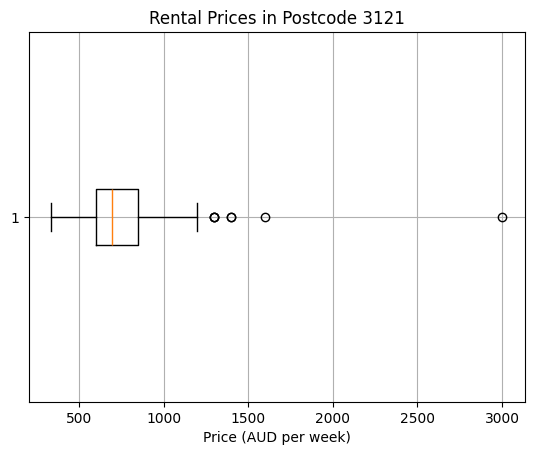

In [51]:
# Box plot of rental price in suburb with postcode 3121
postcode = 3121
rent_by_suburb(property_df, postcode)


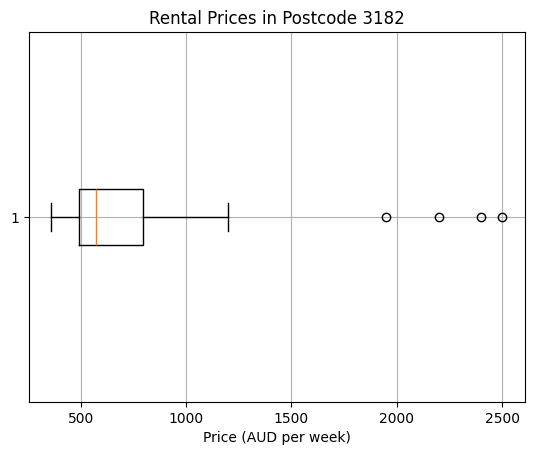

In [52]:
# Box plot of rental price in suburb with postcode 3182
postcode = 3182
rent_by_suburb(property_df, postcode)

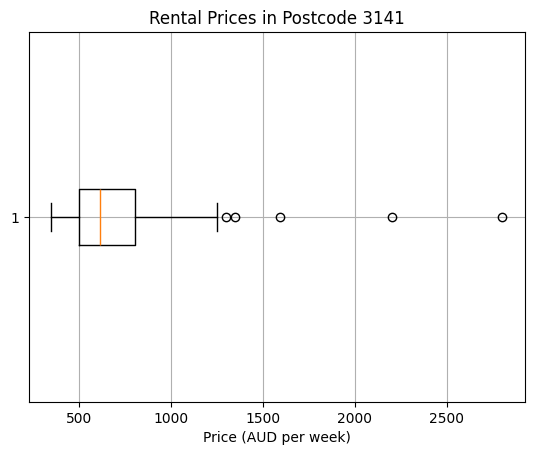

In [53]:
# Box plot of rental price in suburb with postcode 3141
postcode = 3141
rent_by_suburb(property_df, postcode)

From the 3 plots above, we can see that there tends to be high outliers of rental price in a suburb. Therefore we decide to report the median price as the measure of central tendency instead of mean.

We will compute the median rental price per suburb for all properties, 1 bedroom-flats, 2 bedroom-flats, 3 bedroom-flats, 2 bedroom-houses, 3 bedroom-houses and 4 bedroom-houses.

>> Median rental price per suburb

In [59]:
# Define the interested combinations of property types and bedrooms
combinations = [
    ('Apartment / Unit / Flat', 1),
    ('Apartment / Unit / Flat', 2),
    ('Apartment / Unit / Flat', 3),
    ('House', 2),
    ('House', 3),
    ('House', 4)
]

median_price_df = pd.DataFrame()

# Compute median price for the above combinations by suburb
for property_type, bedrooms in combinations:

    # Filter out properties of the current combination
    filtered_df = property_df[(property_df['property type'] == property_type) 
                              & (property_df['bedrooms'] == bedrooms)]
    
    # Compute the median rental price
    median_price = filtered_df.groupby('postcode')['price (AUD per week)'].median().rename(
                                            f'median_{bedrooms}_bedroom_{property_type}')
    median_price_df = pd.concat([median_price_df, median_price], axis=1)

In [ ]:
# Compute the median rental price for all properties by suburb
median_price_all = property_df.groupby(['postcode', 'suburb'])['price (AUD per week)'].mean().rename(
                                                        'median_all_properties')

# Combining the median price for all properties and for the properties of interest
result_df = median_price_all.to_frame().join(median_price_df, on='postcode', how='left')
result_df.reset_index(inplace=True)

In [60]:
# Show the final df
result_df

,postcode,suburb,median_all_properties,median_1_bedroom_Apartment / Unit / Flat,median_2_bedroom_Apartment / Unit / Flat,median_3_bedroom_Apartment / Unit / Flat,median_2_bedroom_House,median_3_bedroom_House,median_4_bedroom_House
0,3000,MELBOURNE,585.600000,525.0,625.0,NaN,NaN,NaN,NaN
1,3002,EAST MELBOURNE,718.214286,475.0,740.0,NaN,625.0,800.0,NaN
2,3003,WEST MELBOURNE,673.750000,520.0,650.0,1100.0,690.0,NaN,NaN
3,3004,MELBOURNE,788.181818,550.0,752.5,1025.0,NaN,NaN,NaN
4,3006,SOUTHBANK,690.128205,535.0,700.0,1100.0,830.0,825.0,NaN
...,...,...,...,...,...,...,...,...,...
152,3936,SAFETY BEACH,700.000000,NaN,NaN,NaN,NaN,NaN,700.0
153,3939,ROSEBUD,720.000000,NaN,NaN,NaN,NaN,720.0,NaN
154,3941,RYE,650.000000,NaN,NaN,NaN,NaN,625.0,NaN
155,3941,TOOTGAROOK,600.000000,NaN,NaN,NaN,NaN,625.0,NaN


In [61]:
# Save the final df
result_df.to_csv('../data/raw/median_price_per_postcode.csv', index=False)